In [2]:
import tensorflow as tf

In [4]:
x = tf.random.normal([2, 784])
w1 = tf.Variable(tf.random.truncated_normal([784, 256], stddev=0.1))
b1 = tf.Variable(tf.zeros([256]))
o1 = tf.matmul(x, w1) + b1
o1 = tf.nn.relu(o1)
o1

<tf.Tensor: shape=(2, 256), dtype=float32, numpy=
array([[0.00000000e+00, 0.00000000e+00, 4.64835739e+00, 7.06662118e-01,
        2.51707959e+00, 3.56506133e+00, 0.00000000e+00, 1.49960041e+00,
        0.00000000e+00, 5.65186501e-01, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 2.33916140e+00, 1.58007872e+00, 3.13218141e+00,
        0.00000000e+00, 1.66976106e+00, 2.80840099e-02, 0.00000000e+00,
        4.43066359e-02, 0.00000000e+00, 6.28802061e-01, 0.00000000e+00,
        0.00000000e+00, 3.48102188e+00, 8.37438941e-01, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 8.62063050e-01,
        1.00670838e+00, 9.26851392e-01, 3.51533198e+00, 0.00000000e+00,
        0.00000000e+00, 1.30798864e+00, 3.09379876e-01, 0.00000000e+00,
        0.00000000e+00, 1.98536551e+00, 8.68117571e-01, 1.18194437e+00,
        9.74789500e-01, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 7.94888139e-01, 0.00000000e+00, 7.16131747e-01,
        1.4536

In [15]:
x = tf.random.normal([4, 28 * 28])
from tensorflow.keras import layers
fc = layers.Dense(512, activation=tf.nn.relu)
h1 = fc(x)
fc.kernel, fc.bias

(<tf.Variable 'dense_10/kernel:0' shape=(784, 512) dtype=float32, numpy=
 array([[ 0.01044782,  0.04821737,  0.00783579, ...,  0.04966674,
          0.05721293,  0.01387031],
        [ 0.04024599,  0.01308782,  0.03172309, ...,  0.04145052,
          0.04976453, -0.0101701 ],
        [ 0.04749798,  0.0208751 , -0.04334835, ..., -0.04527032,
         -0.00964194,  0.0080083 ],
        ...,
        [ 0.03394236,  0.0371133 , -0.00828237, ..., -0.02900222,
          0.02731939, -0.05557375],
        [ 0.02422855, -0.02169414,  0.02608845, ...,  0.04753485,
         -0.00448979,  0.06374341],
        [-0.04347941, -0.00301716, -0.02226015, ..., -0.0145774 ,
          0.03343168,  0.00145798]], dtype=float32)>,
 <tf.Variable 'dense_10/bias:0' shape=(512,) dtype=float32, numpy=
 array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0

In [18]:
fc.trainable_variables, fc.non_trainable_variables, fc.variables

([<tf.Variable 'dense_10/kernel:0' shape=(784, 512) dtype=float32, numpy=
  array([[ 0.01044782,  0.04821737,  0.00783579, ...,  0.04966674,
           0.05721293,  0.01387031],
         [ 0.04024599,  0.01308782,  0.03172309, ...,  0.04145052,
           0.04976453, -0.0101701 ],
         [ 0.04749798,  0.0208751 , -0.04334835, ..., -0.04527032,
          -0.00964194,  0.0080083 ],
         ...,
         [ 0.03394236,  0.0371133 , -0.00828237, ..., -0.02900222,
           0.02731939, -0.05557375],
         [ 0.02422855, -0.02169414,  0.02608845, ...,  0.04753485,
          -0.00448979,  0.06374341],
         [-0.04347941, -0.00301716, -0.02226015, ..., -0.0145774 ,
           0.03343168,  0.00145798]], dtype=float32)>,
  <tf.Variable 'dense_10/bias:0' shape=(512,) dtype=float32, numpy=
  array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,

In [22]:
w1 = tf.Variable(tf.random.truncated_normal([784, 256], stddev=0.1))
b1 = tf.Variable(tf.zeros([256]))
w2 = tf.Variable(tf.random.truncated_normal([256, 128], stddev=0.1))
b2 = tf.Variable(tf.zeros([128]))
w3 = tf.Variable(tf.random.truncated_normal([128, 64], stddev=0.1))
b3 = tf.Variable(tf.zeros([64]))
w4 = tf.Variable(tf.random.truncated_normal([64, 10], stddev=0.1))
b4 = tf.Variable(tf.zeros([10]))

with tf.GradientTape() as tape:
    h1 = x@w1 + tf.broadcast_to(b1, [x.shape[0], 256])
    h1 = tf.nn.relu(h1)
    h2 = h1@w2 + tf.broadcast_to(b2, [h1.shape[0], 128])
    h2 = tf.nn.relu(h2)
    h3 = h2@w3 + tf.broadcast_to(b3, [h2.shape[0], 64])
    h3 = tf.nn.relu(h3)
    h4 = h3@w4 + tf.broadcast_to(b4, [h3.shape[0], 10])

In [25]:
from tensorflow.keras import layers,Sequential

fc1 = layers.Dense(256, activation=tf.nn.relu)
fc2 = layers.Dense(128, activation=tf.nn.relu)
fc3 = layers.Dense(64, activation=tf.nn.relu)
fc4 = layers.Dense(10, activation=None)

x = tf.random.normal([4, 28*28])
h1 = fc1(x)
h2 = fc2(h1)
h3 = fc3(h2)
h4 = fc4(h3)

In [28]:
model = Sequential([
    layers.Dense(256, activation=tf.nn.relu),
    layers.Dense(128, activation=tf.nn.relu),
    layers.Dense(64, activation=tf.nn.relu),
    layers.Dense(10, activation=None),
])
out = model(x)
out

<tf.Tensor: shape=(4, 10), dtype=float32, numpy=
array([[ 0.34628904,  0.5264736 , -0.02323388, -1.1111214 ,  0.16330615,
        -1.1623595 , -0.74597454,  1.3252907 ,  0.03072012, -0.30621818],
       [ 0.5267904 ,  0.6570908 , -0.49961182, -0.73346055,  0.3831015 ,
        -1.2463441 ,  0.08639441,  0.52111274,  0.54095304, -0.47714168],
       [-0.36729228,  0.10818738, -0.03948604, -1.0673456 ,  0.42767826,
        -0.4288611 , -0.0722473 ,  0.16242479,  0.58592075,  0.20983776],
       [-0.74885213, -0.6451674 ,  0.4222113 , -1.493582  ,  1.0165097 ,
         0.6086759 , -0.9752508 , -0.04852732, -0.22591536, -1.4102275 ]],
      dtype=float32)>

In [1]:
import tensorflow as tf

In [12]:
x = tf.linspace(-6., 6., 100)

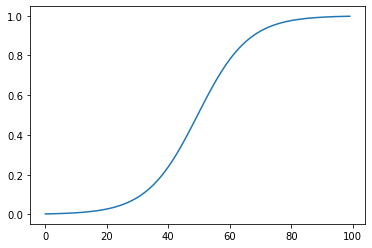

In [13]:
import matplotlib.pyplot as plt
plt.plot(tf.nn.sigmoid(x).numpy())

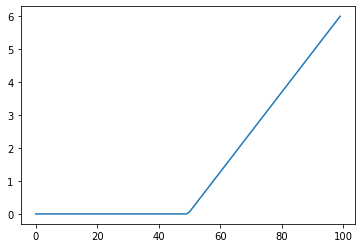

In [14]:
plt.plot(tf.nn.relu(x).numpy())

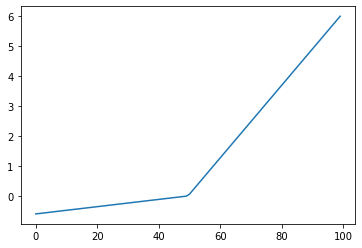

In [15]:
plt.plot(tf.nn.leaky_relu(x, alpha=0.1).numpy())

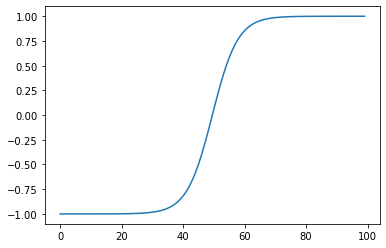

In [16]:
plt.plot(tf.nn.tanh(x).numpy())

In [17]:
z = tf.constant([2., 1., 0.1])
tf.nn.softmax(z)
t

<tf.Tensor: shape=(3,), dtype=float32, numpy=array([0.6590012 , 0.24243298, 0.09856589], dtype=float32)>

In [20]:
z = tf.random.normal([2, 10])
y = tf.constant([1, 3])
y_onehot = tf.one_hot(y, depth=10)
loss = tf.keras.losses.categorical_crossentropy(y_onehot, z, from_logits=True)
loss = tf.reduce_mean(loss)
loss

<tf.Tensor: shape=(), dtype=float32, numpy=2.90024>

In [21]:
criteon = tf.keras.losses.CategoricalCrossentropy(from_logits=True)
loss = criteon(y_onehot, z)
loss

<tf.Tensor: shape=(), dtype=float32, numpy=2.90024>

In [22]:
x = tf.linspace(-6., 6., 10)
tf.tanh(x)

<tf.Tensor: shape=(10,), dtype=float32, numpy=
array([-0.99998784, -0.99982315, -0.9974579 , -0.9640276 , -0.58278286,
        0.58278316,  0.9640276 ,  0.99745804,  0.99982315,  0.99998784],
      dtype=float32)>

In [28]:
o = tf.random.normal([2, 10])
y = tf.constant([1, 3])
y_onehot = tf.one_hot(y, depth=10)
loss = tf.keras.losses.MSE(y_onehot, o)
loss = tf.reduce_mean(loss)
loss

<tf.Tensor: shape=(), dtype=float32, numpy=1.2309701>

In [30]:
criteon = tf.keras.losses.MeanSquaredError()
loss = criteon(y_onehot, o)
loss

<tf.Tensor: shape=(), dtype=float32, numpy=1.2309701>

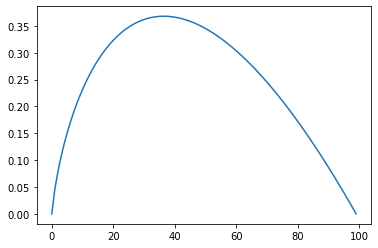

In [40]:
p = tf.linspace(0.00001, 1, 100)
entropy = -p*tf.math.log(p)
plt.plot(entropy.numpy()) 

In [44]:
from tensorflow import keras
import pandas as pd
dataset_path = keras.utils.get_file("auto-mpg.data", "http://archive.ics.uci.edu/ml/machine-learning-databases/auto-mpg/auto-mpg.data")

In [60]:
column_names = ['MPG', 'Cylinders', 'Displacement', 'Horsepower', 'Weight', 'Acceleration', 'Model Year', 'Origin']
raw_dataset = pd.read_csv(dataset_path, names = column_names, na_values = "?", comment = "\t", sep = " ", skipinitialspace = True)
dataset = raw_dataset.copy()
dataset.head()

,MPG,Cylinders,Displacement,Horsepower,Weight,Acceleration,Model Year,Origin
0,18.0,8,307.0,130.0,3504.0,12.0,70,1
1,15.0,8,350.0,165.0,3693.0,11.5,70,1
2,18.0,8,318.0,150.0,3436.0,11.0,70,1
3,16.0,8,304.0,150.0,3433.0,12.0,70,1
4,17.0,8,302.0,140.0,3449.0,10.5,70,1


In [61]:
dataset.isna().sum()

MPG             0
Cylinders       0
Displacement    0
Horsepower      6
Weight          0
Acceleration    0
Model Year      0
Origin          0
dtype: int64

In [62]:
dataset = dataset.dropna()
dataset.isna().sum()

MPG             0
Cylinders       0
Displacement    0
Horsepower      0
Weight          0
Acceleration    0
Model Year      0
Origin          0
dtype: int64

In [63]:
origin = dataset.pop("Origin")
dataset["USA"] =  (origin == 1) * 1.0
dataset["Europe"] =  (origin == 2) * 1.0
dataset["Japan"] =  (origin == 3) * 1.0
dataset.tail()

,MPG,Cylinders,Displacement,Horsepower,Weight,Acceleration,Model Year,USA,Europe,Japan
393,27.0,4,140.0,86.0,2790.0,15.6,82,1.0,0.0,0.0
394,44.0,4,97.0,52.0,2130.0,24.6,82,0.0,1.0,0.0
395,32.0,4,135.0,84.0,2295.0,11.6,82,1.0,0.0,0.0
396,28.0,4,120.0,79.0,2625.0,18.6,82,1.0,0.0,0.0
397,31.0,4,119.0,82.0,2720.0,19.4,82,1.0,0.0,0.0


In [66]:
train_dataset = dataset.sample(frac = 0.8, random_state = 0)
test_dataset = dataset.drop(train_dataset.index)

In [67]:
train_labels = train_dataset.pop("MPG")
test_labels = test_dataset.pop("MPG")

In [70]:
train_stats = train_dataset.describe().transpose()
train_stats

,count,mean,std,min,25%,50%,75%,max
Cylinders,314.0,5.477707,1.699788,3.0,4.00,4.0,8.00,8.0
Displacement,314.0,195.318471,104.331589,68.0,105.50,151.0,265.75,455.0
Horsepower,314.0,104.869427,38.096214,46.0,76.25,94.5,128.00,225.0
Weight,314.0,2990.251592,843.898596,1649.0,2256.50,2822.5,3608.00,5140.0
Acceleration,314.0,15.559236,2.789230,8.0,13.80,15.5,17.20,24.8
Model Year,314.0,75.898089,3.675642,70.0,73.00,76.0,79.00,82.0
USA,314.0,0.624204,0.485101,0.0,0.00,1.0,1.00,1.0
Europe,314.0,0.178344,0.383413,0.0,0.00,0.0,0.00,1.0
Japan,314.0,0.197452,0.398712,0.0,0.00,0.0,0.00,1.0


In [73]:
def norm(x):
    return (x - train_stats['mean']) / train_stats['std']
normed_train_data = norm(train_dataset)
normed_test_data = norm(test_dataset)
print(normed_train_data.shape, train_labels.shape)
print(normed_test_data.shape, test_labels.shape)

(314, 9) (314,)
(78, 9) (78,)


In [104]:
train_db = tf.data.Dataset.from_tensor_slices((normed_train_data.values, train_labels.values))
train_db = train_db.shuffle(100).batch(32)

In [108]:
from tensorflow.keras import layers, losses
class Network(keras.Model):
    def __init__(self):
        super(Network, self).__init__()
        self.fc1 = layers.Dense(64, activation = 'relu')
        self.fc2 = layers.Dense(64, activation = 'relu')
        self.fc3 = layers.Dense(1)
        
    def call(self, inputs, training = None, mask = None):
        x = self.fc1(inputs)
        x = self.fc2(x)
        x = self.fc3(x)
        
        return x
    
model = Network()
model.build(input_shape = (4, 9))
model.summary()
optimizer = tf.keras.optimizers.RMSprop(0.001)

Model: "network_7"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_18 (Dense)             multiple                  640       
_________________________________________________________________
dense_19 (Dense)             multiple                  4160      
_________________________________________________________________
dense_20 (Dense)             multiple                  65        
Total params: 4,865
Trainable params: 4,865
Non-trainable params: 0
_________________________________________________________________


In [109]:
MSEs = []
MAEs = []
for epoch in range(200):
    for step, (x, y) in enumerate(train_db):
        with tf.GradientTape() as tape:
            out = model(x)
            loss = tf.reduce_mean(losses.MSE(y, out))
            mae_loss = tf.reduce_mean(losses.MAE(y, out))
        if step % 10 == 0:
            print(epoch, step, float(mae_loss))
            
        grads = tape.gradient(loss, model.trainable_variables)
        optimizer.apply_gradients(zip(grads, model.trainable_variables))
    MSEs.append(loss)
    MAEs.append(mae_loss)

0 0 23.51425552368164
1 0 23.446475982666016
2 0 20.55103302001953
3 0 17.630578994750977
4 0 14.85883617401123
5 0 16.114002227783203
6 0 11.92167854309082
7 0 8.671256065368652
8 0 8.762761116027832
9 0 7.997014045715332
10 0 9.45529556274414
11 0 8.620532989501953
12 0 7.600986480712891
13 0 6.067539691925049
14 0 8.002924919128418
15 0 6.1696624755859375
16 0 5.996676445007324
17 0 5.6721296310424805
18 0 7.003918647766113
19 0 7.11242151260376
20 0 6.309250831604004
21 0 5.968117713928223
22 0 6.259675025939941
23 0 7.171787738800049
24 0 6.535778999328613
25 0 5.149265289306641
26 0 6.477478504180908
27 0 5.7430877685546875
28 0 5.864894866943359
29 0 6.569626331329346
30 0 6.429725170135498
31 0 4.984862327575684
32 0 5.202165126800537
33 0 6.718742370605469
34 0 6.456430435180664
35 0 6.899871826171875
36 0 6.321166515350342
37 0 6.954508304595947
38 0 7.688525676727295
39 0 6.226279258728027
40 0 5.574362754821777
41 0 6.1534624099731445
42 0 6.131002426147461
43 0 5.740283966

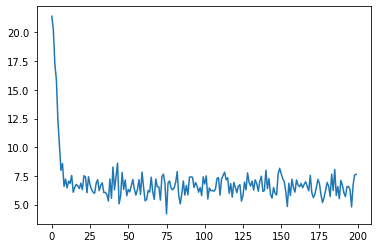

In [112]:
import matplotlib.pyplot as plt
plt.plot(MAEs)